In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df=pd.read_csv("loan.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape #it give us total number of rows and columns

(614, 13)

In [4]:
df.isnull().sum() #it shows the number of null values in each column

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df.isnull().sum().sum() #it gives us total null values in entire dataset

149

In [6]:
(df.isnull().sum()/df.shape[0])*100 #it gives us %of missing value in each column


Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [7]:
(df.isnull().sum().sum()/(df.shape[0]*df.shape[1]))*100 #it give us %of missing value in entire dataset

1.8667000751691305

In [8]:
df.notnull().sum() #it shows number of not null values in dataset

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

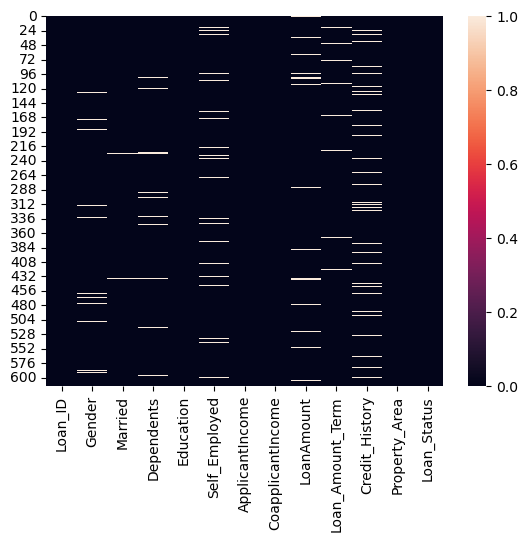

In [9]:
sns.heatmap(df.isnull())
plt.show()

# Filling missing values

In [10]:
# filling missing values by backword and forward filling
df.fillna(method="bfill")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
# Filling missing values in object types using MODE
for i in df.select_dtypes(include='object').columns:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [12]:
#Filling missing values by the help of sklearn
df.select_dtypes(include="float64").columns

Index(['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History'],
      dtype='object')

In [13]:

from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy="mean")
ar=si.fit_transform(df[['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History']])

In [14]:
new_data=pd.DataFrame(ar,columns=df.select_dtypes(include="float64").columns)

In [15]:
new_data.isnull().sum()

CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

# Label Encoding

In [16]:
data=pd.DataFrame({"name":["anurag","dog","india","sultanur","IIT PATNA"]})
data

,name
0,anurag
1,dog
2,india
3,sultanur
4,IIT PATNA


In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["en_name"]=le.fit_transform(data['name'])

In [18]:
data

,name,en_name
0,anurag,1
1,dog,2
2,india,3
3,sultanur,4
4,IIT PATNA,0


In [19]:
# NOW WE WILL DO LABEL INCODING IN LOAN_CSV DATA
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [20]:
la=LabelEncoder()
la.fit(df["Property_Area"])

LabelEncoder()

In [21]:
la.transform(df["Property_Area"])

array([2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 0, 1, 0, 2, 2, 1, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 0, 2, 2, 2, 2, 0, 0, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1,
       2, 1, 0, 1, 1, 0, 1, 2, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 2, 2,
       1, 1, 1, 1, 0, 2, 1, 0, 0, 2, 1, 1, 2, 1, 2, 2, 0, 1, 0, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 1, 0, 2, 0, 0, 0, 1, 1, 0, 2, 0, 1, 1, 0,
       0, 1, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2,
       1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 0, 1, 0, 2,
       2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 1, 2, 0, 0, 2, 0, 1, 2, 1, 1, 0,
       1, 0, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1, 1, 2, 1, 0, 2, 1, 2, 2, 0, 0,
       1, 0, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 0, 2, 2,

In [22]:
df["Property_Area"]=la.transform(df["Property_Area"])

In [23]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,2,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,2,Y


# Ordinal Encoding

In [24]:
data=pd.DataFrame({"size":['s','m','l','xl','xxl','l','s','m','s']})
data

,size
0,s
1,m
2,l
3,xl
4,xxl
5,l
6,s
7,m
8,s


In [25]:
ord_data=[['s','m','l','xl','xxl']]

In [26]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder(categories=ord_data)
oe.fit(data[['size']])

OrdinalEncoder(categories=[['s', 'm', 'l', 'xl', 'xxl']])

In [27]:
data['size_en']=oe.transform(data[['size']])

In [28]:
data

,size,size_en
0,s,0.0
1,m,1.0
2,l,2.0
3,xl,3.0
4,xxl,4.0
5,l,2.0
6,s,0.0
7,m,1.0
8,s,0.0


# Outliers

In [29]:
# We can find the outliers by the help of box plot
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,2,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,2,Y


In [30]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,1.037459
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.787482
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,2.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,2.000000


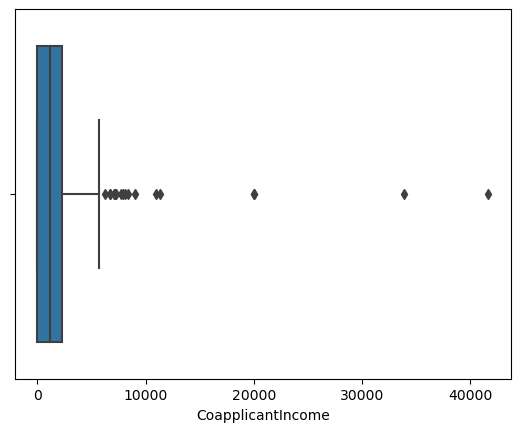

In [31]:
sns.boxplot(x='CoapplicantIncome',data=df)
plt.show()

/var/folders/wm/jdbjtblj4ld0zn613jtfpr_c0000gn/T/ipykernel_89860/1457747018.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])


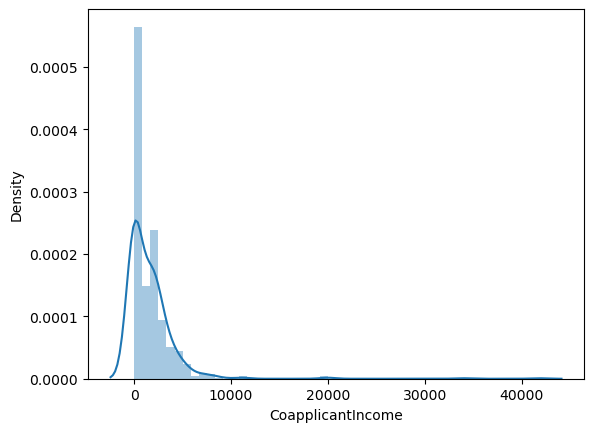

In [32]:
sns.distplot(df['CoapplicantIncome'])
plt.show()

# How to remove OUTLIERS by the method of IQR 

In [33]:

q1=df['CoapplicantIncome'].quantile(0.25)
q3=df['CoapplicantIncome'].quantile(0.75)

In [34]:
IQR=q3-q1

In [35]:
min_range=q1-(1.5*IQR)
max_range=q3+(1.5*IQR)

In [36]:
new_df=df[df['CoapplicantIncome']<=max_range]

In [37]:
new_df.shape

(596, 13)

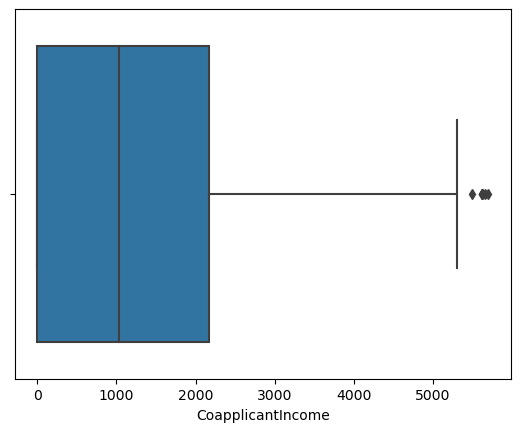

In [38]:
sns.boxplot(x='CoapplicantIncome',data=new_df)
plt.show()
             

# Removing outliers by the help of direct method

<Axes: xlabel='CoapplicantIncome'>

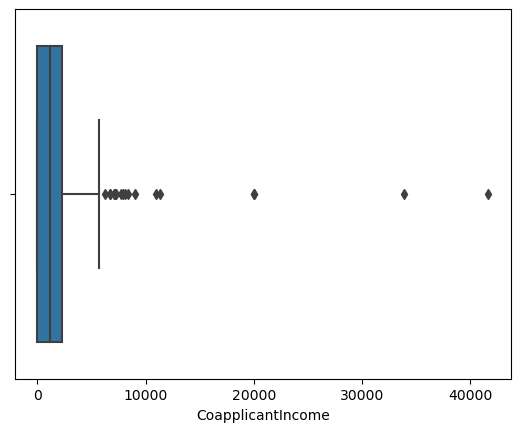

In [39]:

sns.boxplot(x='CoapplicantIncome',data=df)

/var/folders/wm/jdbjtblj4ld0zn613jtfpr_c0000gn/T/ipykernel_89860/2149142820.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

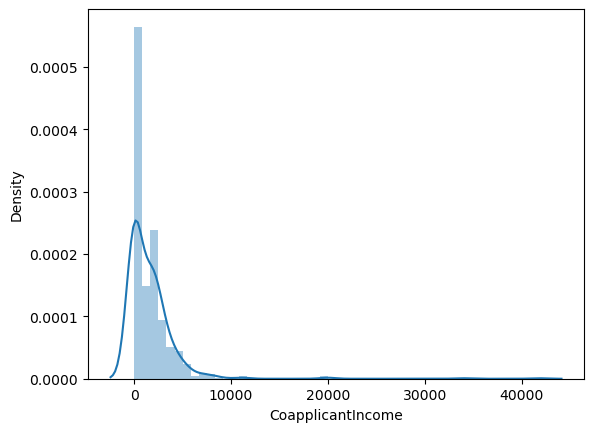

In [40]:
sns.distplot(df['CoapplicantIncome'])

In [41]:
min_range=df['CoapplicantIncome'].mean()-(3*df['CoapplicantIncome'].std())
max_range=df['CoapplicantIncome'].mean() + (3*df['CoapplicantIncome'].std())

In [42]:
min_range,max_range

(-7157.499309645475, 10399.990905699677)

In [43]:
new_data=df[df['CoapplicantIncome']<=max_range]

In [44]:
new_data.shape

(608, 13)

<Axes: xlabel='CoapplicantIncome'>

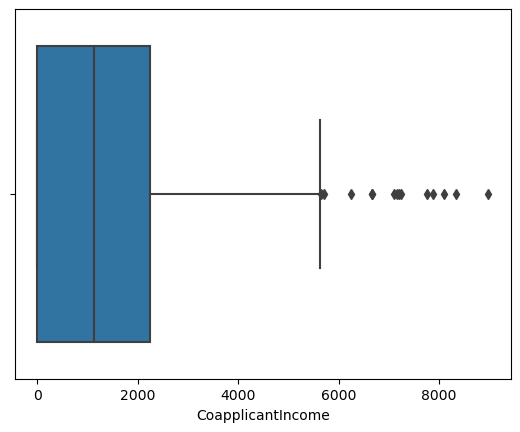

In [45]:
sns.boxplot(x='CoapplicantIncome',data=new_data)

# Feature Scaling

In [46]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(df[['CoapplicantIncome']])

array([[-5.54487330e-01],
       [-3.87315485e-02],
       [-5.54487330e-01],
       [ 2.51979602e-01],
       [-5.54487330e-01],
       [ 8.80599712e-01],
       [-3.59954435e-02],
       [ 3.01913517e-01],
       [-3.25753123e-02],
       [ 3.19671255e+00],
       [-3.15078148e-01],
       [ 7.48168067e-02],
       [ 2.21787100e+00],
       [ 4.16829924e-01],
       [-1.83061084e-01],
       [-5.54487330e-01],
       [-5.54487330e-01],
       [-5.54487330e-01],
       [-5.54487330e-01],
       [ 6.42558582e-01],
       [-5.54487330e-01],
       [ 1.36933646e+00],
       [ 9.90997380e-02],
       [ 1.01151817e-01],
       [ 4.45901040e-01],
       [-5.54487330e-01],
       [ 2.16068224e-01],
       [-1.98793688e-01],
       [-5.54487330e-01],
       [ 1.57925994e-01],
       [ 5.97754864e-01],
       [-5.54487330e-01],
       [-5.54487330e-01],
       [ 1.56485373e-02],
       [ 4.71552023e-01],
       [ 1.52453784e-01],
       [-9.96098834e-02],
       [-5.54901912e-02],
       [ 1.9

In [47]:
df['CoapplicantIncome_ss']=pd.DataFrame(sc.fit_transform(df[['CoapplicantIncome']]),columns=['x'])

In [48]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_ss
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,2,Y,-0.554487
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,N,-0.038732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2,Y,-0.554487
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,2,Y,0.251980
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,2,Y,-0.554487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,0,Y,-0.554487
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,0,Y,-0.554487
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,2,Y,-0.472404
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,2,Y,-0.554487


# Normalization

In [51]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
ms.fit(df[['CoapplicantIncome']])

MinMaxScaler()

In [53]:
df['CoapplicantIncome_min']=ms.transform(df[['CoapplicantIncome']])

In [54]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_ss,CoapplicantIncome_min
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,2,Y,-0.554487,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,N,-0.038732,0.036192
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2,Y,-0.554487,0.000000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,2,Y,0.251980,0.056592
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,2,Y,-0.554487,0.000000


# Checking and removing duplicate data

In [65]:
data={"name":['a','b','c','d','a','c'],"English":[8,7,5,8,8,5],"Hindi":[2,3,4,5,2,6]}
df=pd.DataFrame(data)
df

,name,English,Hindi
0,a,8,2
1,b,7,3
2,c,5,4
3,d,8,5
4,a,8,2
5,c,5,6


In [66]:
# df["Duplicated"]=df.duplicated()

In [68]:
df.drop_duplicates(keep='first',inplace=True)

In [69]:
df

,name,English,Hindi
0,a,8,2
1,b,7,3
2,c,5,4
3,d,8,5
5,c,5,6
